In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Instructions
(Taken from 3.4.4, which uses a dataset from epicurious.com that includes features and 0-5 rankings of recipes.)

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [2]:
raw_data_df = pd.read_csv("epi_r.csv")
raw_data_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
raw_data_df.shape

(20052, 680)

Now let's turn rating into a categorical variable.  The instructions ask for a binary classifier, but it would be far more useful to have a classifier that classifies as one of the integer star-ratings (0,1,2,3,4,5).  I'll try both.

In [167]:
categorical_df = raw_data_df.copy()
categorical_df['rating'] = round(categorical_df['rating']).astype(int)
categorical_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,4,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
raw_data_df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

For the binary dataset, we'll mark True if the recipe is greater than the median rating of 4.375, and False otherwise.

In [169]:
binary_df = raw_data_df.copy()
binary_df['rating'] = binary_df['rating'] > 4.375
binary_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",False,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,False,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,False,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,False,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature selection with random forest

To get a quick sense of which features carry a lot of information about the ratings, let's try running a quick random forest and seeing which features that algorithm thinks are important.

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rfc = RandomForestClassifier()
X = categorical_df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = categorical_df.rating
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Let's check accuracy to make sure this is working reasonably well:

In [172]:
rfc.score(X, Y)

0.9831936963893876

In [173]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X, Y, cv=4)

array([0.70482649, 0.71314582, 0.71593856, 0.707502  ])

Looks like we're getting passable scores here -- albeit with major overfitting problems.  The accuracy on the cross-validation set is only around 0.69, which isn't great.  Still, this should give us at least a general sense of feature importance.

In [174]:
fi = rfc.feature_importances_
cols = categorical_df.columns
labeled_fi = []
for i in range(len(fi)):
    labeled_fi.append((cols[i], fi[i]))
labeled_fi = sorted(labeled_fi, key=lambda x: -x[1])
labeled_fi

[('dip', 0.012690819821325023),
 ('blackberry', 0.012211043782076238),
 ('germany', 0.012079073011375865),
 ('stock', 0.010636076042000123),
 ('utah', 0.010122345062687058),
 ('prune', 0.010008114125810754),
 ('watercress', 0.009193024200906086),
 ('atlanta', 0.008974346037510034),
 ('honey', 0.00843985296069632),
 ('drink', 0.0082336176033822),
 ('mexico', 0.0079642734531403),
 ('engagement party', 0.007802990602141393),
 ('kahlúa', 0.007655586520220084),
 ('tilapia', 0.00758670532771572),
 ('cucumber', 0.007514972897799378),
 ('hanukkah', 0.00729714875068211),
 ('hamburger', 0.007182118242572445),
 ('oklahoma', 0.007181840352847935),
 ('shallot', 0.007121703877819586),
 ('soy sauce', 0.007100867622047457),
 ('fritter', 0.007090412404960919),
 ('sandwich theory', 0.007042101682141147),
 ('whiskey', 0.006851082791585038),
 ('san francisco', 0.006812855562392664),
 ('date', 0.006709272910018603),
 ('freeze/chill', 0.006693803130842032),
 ('kentucky derby', 0.006691526402528754),
 ('penn

The zeros at the bottom of this list aren't very surprising: they're mostly terms like "providence" that are too rare to be of much predictive use, or terms like "meat" that are too generic or too neutral to differentiate much.

The top terms, however, are surprising.  They don't seem to be especially delightful or repulsive, nor teribly common, nor do they all seem to have anything in common.  It is interesting to note the prominence of place names here.  It's possible that they're functioning as proxies of different cuisines or 'genres' of food, thus serving as category markers.  This would explain why they're more helpful than just individual ingredients.

Now let's try running random forest with just the top 30 to see how much of the accuracy is preserved.

In [124]:
top_30 = [tup[0] for tup in labeled_fi[:30]]
rfc_30 = RandomForestClassifier()
rfc.score(categorical_df[top_30], categorical_df.rating)

0.6691103131857171

In [125]:
cross_val_score(rfc_2, categorical_df[top_30], categorical_df.rating, cv=5)

array([0.66234737, 0.66492147, 0.67090501, 0.66683292, 0.66857999])

Now we're getting around 0.67 instead of 0.69 - not a big loss for dropping all but 30 of our 600 features.  Out of curiosity, let's see what happens if we try this with the nutritional information added in at the cost of losing the 4,000 (of about 20,000) examples that don't have nutritional info.

In [32]:
categorical_nutr_df = categorical_df.dropna().copy()
categorical_nutr_df.shape

(15864, 680)

In [130]:
rfc_2 = RandomForestClassifier()
cols = top_30 + ['calories', 'protein', 'fat', 'sodium']
rfc_2.fit(categorical_nutr_df[cols], categorical_nutr_df['rating'])
rfc_2.score(categorical_nutr_df[cols], categorical_nutr_df['rating'])

0.9757942511346445

In [131]:
cross_val_score(rfc_2, categorical_nutr_df[cols], categorical_nutr_df['rating'], cv=5)

array([0.69584383, 0.69114403, 0.69082887, 0.68369599, 0.6978871 ])

That makes a slight improvement, but not much.  Given the sacrifice in data required, and the fact that those four columns are strongly correlated, let's leave them out for now.

Finally, let's check for feature correlations in this top 30 list.

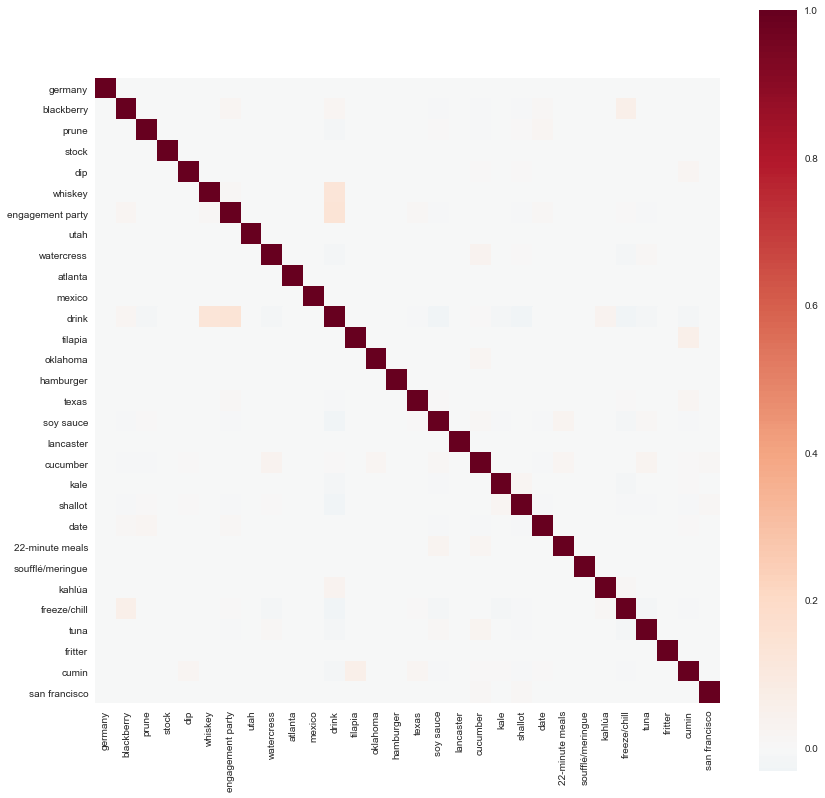

In [134]:
sns.set()
plt.figure(figsize=(14,14))
corr = categorical_df[top_30].corr()
sns.heatmap(corr, square=True, center=0, cmap='RdBu_r');

This looks pretty untroubling.  Now, armed with this reduced dataset as instructed by the assignment, let's see how the SVM classifier runs.

# Running the SVM classifier with the reduced dataset

In [141]:
from sklearn.svm import SVC
svc = SVC()
cols = top_30 + ['fat']
X = categorical_nutr_df[cols]
Y = categorical_nutr_df.rating
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
svc.score(X,Y)

0.6824886535552194

In [143]:
cross_val_score(svc, X, Y, cv=4)

array([0.67716734, 0.68338795, 0.68121059, 0.68440969])

This produces almost exactly the same scores as the random forest, with a similar lack of overfitting - the only difference really is that it takes much longer.

# Shifting to binary categorization
Now let's try both the random forest and the SVM with the binary dataset to predict whether a recipe will score above or below the median score.

In [161]:
svc_bi = SVC()
X = binary_df[top_30]
Y = binary_df.rating
svc_bi.fit(X,Y)
svc_bi.score(X,Y)

0.8644025533612607

In [156]:
cross_val_score(svc_bi, X, Y, cv=4)

array([0.86437974, 0.86435268, 0.86435268, 0.86452514])

In [159]:
rfc_bi = RandomForestClassifier()
rfc_bi.fit(X, Y)
rfc_bi.score(X, Y)

0.8646519050468782

In [160]:
cross_val_score(rfc_bi, X, Y, cv=4)

array([0.86437974, 0.86235787, 0.86395372, 0.86392658])

That looks like a reasonably good score.  There's no sign of overfitting in either, so there's no need to try reducing C for the SVM.  (Raising C by a couple orders of magnitude didn't increase the accuracy either.)  And the two models produce pretty identical results.

# Conclusions

The feature selection I performed here successfully pruned down the feature set to 30 features that produced test accuracies within two percentage points of the test accuracies of the entire dataset.  The scores produced by running these features through the SVM were almost precisely equivalent to the scores for random forest, both for binary and six-part classification.  Tuning C for the SVM within a reasonable range made no perceptible difference.

In short, it seems as though SVM and Random Forest are equivalently effective for this purpose, but Random Forest is a lot faster.

The one other step that could be taken would be to examine the learning curves for increasing the number of features included.  This would take quite a while with the SVM, but I'll try it with Random Forest here:

In [179]:
top_n_features = [10,20,30,50,70,100,150,200]
train_accuracies = []
test_accuracies = []
Y = categorical_df.rating
# this loop calculates test and train accuracy for each subset of top features
for n in top_n_features:
    cols = [tup[0] for tup in labeled_fi[:n]] # labeled_fi is our labeled feature importances set from above
    X_temp = categorical_df[cols]
    rfc_temp = RandomForestClassifier()
    rfc_temp.fit(X_temp, Y)
    train_acc = rfc_temp.score(X_temp,Y)
    test_acc = np.mean(cross_val_score(rfc_temp, X_temp, Y, cv=3))
    train_accuracies.append(round(train_acc, 3))
    test_accuracies.append(round(test_acc, 3))

In [180]:
print(train_accuracies)
print(test_accuracies)

[0.668, 0.669, 0.67, 0.673, 0.68, 0.702, 0.737, 0.83]
[0.668, 0.667, 0.668, 0.665, 0.663, 0.661, 0.651, 0.643]


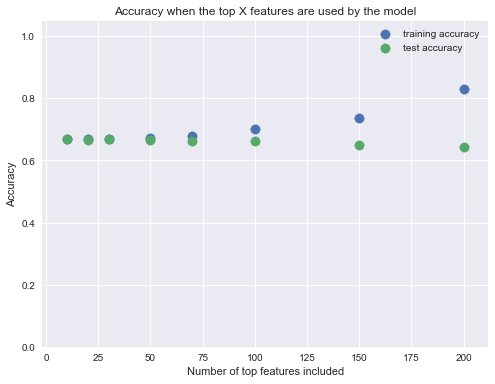

In [184]:
top_n_features = [10,20,30,50,70,100,150,200]
plt.figure(figsize=(8,6))
plt.scatter(top_n_features, train_accuracies, s=90, label="training accuracy")
plt.scatter(top_n_features, test_accuracies, s=90, label="test accuracy")
plt.title("Accuracy when the top X features are used by the model")
plt.xlabel("Number of top features included")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim((0,1.05))
plt.show()

As we can see, adding more features produced more overfitting but didn't help – and in fact, eventually hurt – the teest accuracy.  So these top 30 features are as good as we're going to get for this purpose.